<a href="https://colab.research.google.com/github/mnstrvbs/UG_Group6_ST1/blob/main/ST_Assessment_3_Part_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [262]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [263]:
%cd /content/drive/MyDrive/ST_Assessment_3

/content/drive/MyDrive/ST_Assessment_3


In [264]:
!pwd

/content/drive/MyDrive/ST_Assessment_3


In [521]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Step 1
UsedCars = pd.read_csv('train-data.csv')

UsedCars=UsedCars.drop_duplicates(subset=['Name',  'Year', 'Fuel_Type', 'Transmission'])
print('Shape After deleting duplicate values:', UsedCars.shape)

Shape After deleting duplicate values: (3822, 14)


In [522]:
UsedCars = UsedCars.drop(['New_Price', 'Location', 'Name', 'Power', 'Unnamed: 0'], axis=1)

In [523]:
UsedCars['Transmission'] = UsedCars['Transmission'].replace({'Manual': 0, 'Automatic': 1})

In [524]:
UsedCars['Owner_Type'] = UsedCars['Owner_Type'].replace({'First': 0, 'Second': 1, 'Third': 2, 'Fourth & Above': 3})

In [525]:
UsedCars['Fuel_Type'] = UsedCars['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4})

In [526]:
UsedCars['Mileage'] = UsedCars['Mileage'].str.replace(' kmpl', '')
UsedCars['Mileage'] = UsedCars['Mileage'].str.replace(' km/kg', '')
UsedCars['Mileage'] = pd.to_numeric(UsedCars['Mileage'])

In [527]:
UsedCars['Engine'] = UsedCars['Engine'].str.replace(' CC', '')
UsedCars['Engine'] = pd.to_numeric(UsedCars['Engine'])

<Axes: >

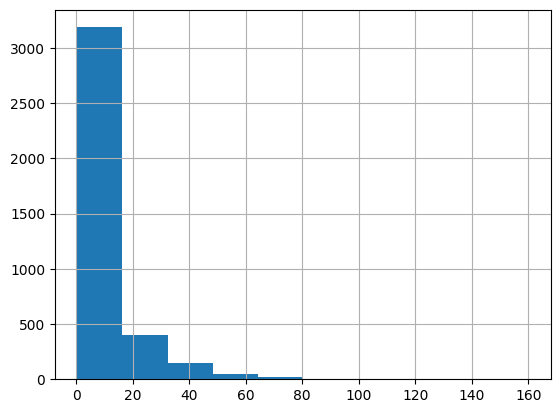

In [528]:
UsedCars['Price'].hist()

In [529]:
#Step 5
UsedCars.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price
0,2010,72000,2,0,0,26.60,998.0,5.0,1.75
1,2015,41000,1,0,0,19.67,1582.0,5.0,12.50
2,2011,46000,0,0,0,18.20,1199.0,5.0,4.50
3,2012,87000,1,0,0,20.77,1248.0,7.0,6.00
4,2013,40670,1,1,1,15.20,1968.0,5.0,17.74


In [530]:
UsedCars.tail()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price
6007,2011,68000,1,0,0,19.30,1248.0,5.0,2.75
6010,2013,33746,0,0,0,18.50,1198.0,5.0,3.20
6011,2009,53000,0,1,0,0.00,3597.0,5.0,4.75
6016,2012,55000,1,0,1,14.00,2498.0,8.0,2.90
6018,2011,47000,1,0,0,25.44,936.0,5.0,2.50


In [531]:
UsedCars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3822 entries, 0 to 6018
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               3822 non-null   int64  
 1   Kilometers_Driven  3822 non-null   int64  
 2   Fuel_Type          3822 non-null   int64  
 3   Transmission       3822 non-null   int64  
 4   Owner_Type         3822 non-null   int64  
 5   Mileage            3820 non-null   float64
 6   Engine             3791 non-null   float64
 7   Seats              3787 non-null   float64
 8   Price              3822 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 298.6 KB


In [532]:
UsedCars.describe()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price
count,3822.000000,3.822000e+03,3822.000000,3822.000000,3822.000000,3820.000000,3791.000000,3787.000000,3822.000000
mean,2013.256149,5.889588e+04,0.548666,0.305076,0.221088,17.707359,1658.987338,5.283074,10.012368
std,3.567946,1.110217e+05,0.538117,0.460500,0.480496,4.706791,627.900414,0.856063,12.279601
min,1998.000000,1.710000e+02,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.440000
25%,2011.000000,3.229325e+04,0.000000,0.000000,0.000000,14.740000,1198.000000,5.000000,3.450000
50%,2014.000000,5.213600e+04,1.000000,0.000000,0.000000,17.710000,1497.000000,5.000000,5.750000
75%,2016.000000,7.400000e+04,1.000000,1.000000,0.000000,20.540000,1995.000000,5.000000,10.500000
max,2019.000000,6.500000e+06,4.000000,1.000000,3.000000,33.540000,5998.000000,10.000000,160.000000


In [533]:
UsedCars.nunique()

,0
Year,22
Kilometers_Driven,2025
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,430
Engine,146
Seats,9
Price,1097


Step 5 observations:

Year: Catagorical. Selected.
Kilometers_Driven: Continuous. Selected.
Fuel_Type: Catagorical. Selected.
Transmission: Catagorical. Selected.
Owner_Type: Catagorical. Selected.
Mileage: Continuous. Selected.
Engine: Continuous. Selected.
Seats: Catagorical. Selected.
Price. Continuous. Selected. This is our target variable

In [534]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    import matplotlib.pyplot as plt
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

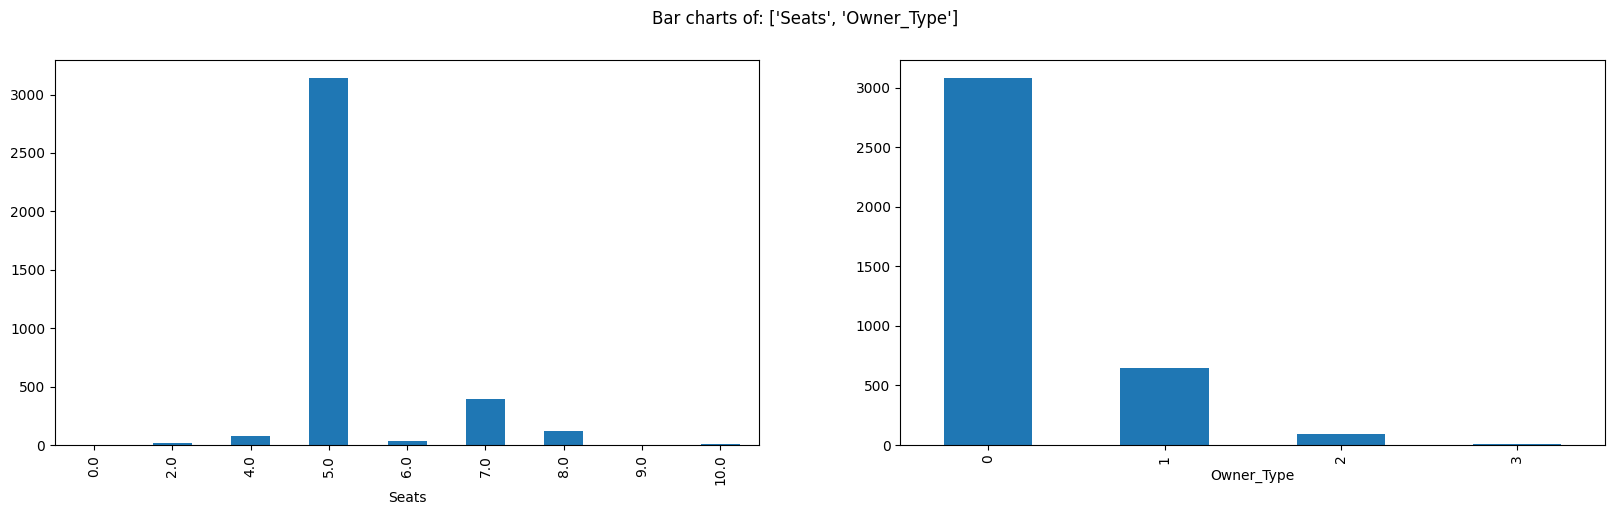

In [535]:
PlotBarCharts(inpData=UsedCars, colsToPlot=['Seats', 'Owner_Type'])

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Kilometers_Driven'}>],
       [<Axes: title={'center': 'Transmission'}>,
        <Axes: title={'center': 'Mileage'}>],
       [<Axes: title={'center': 'Engine'}>, <Axes: >]], dtype=object)

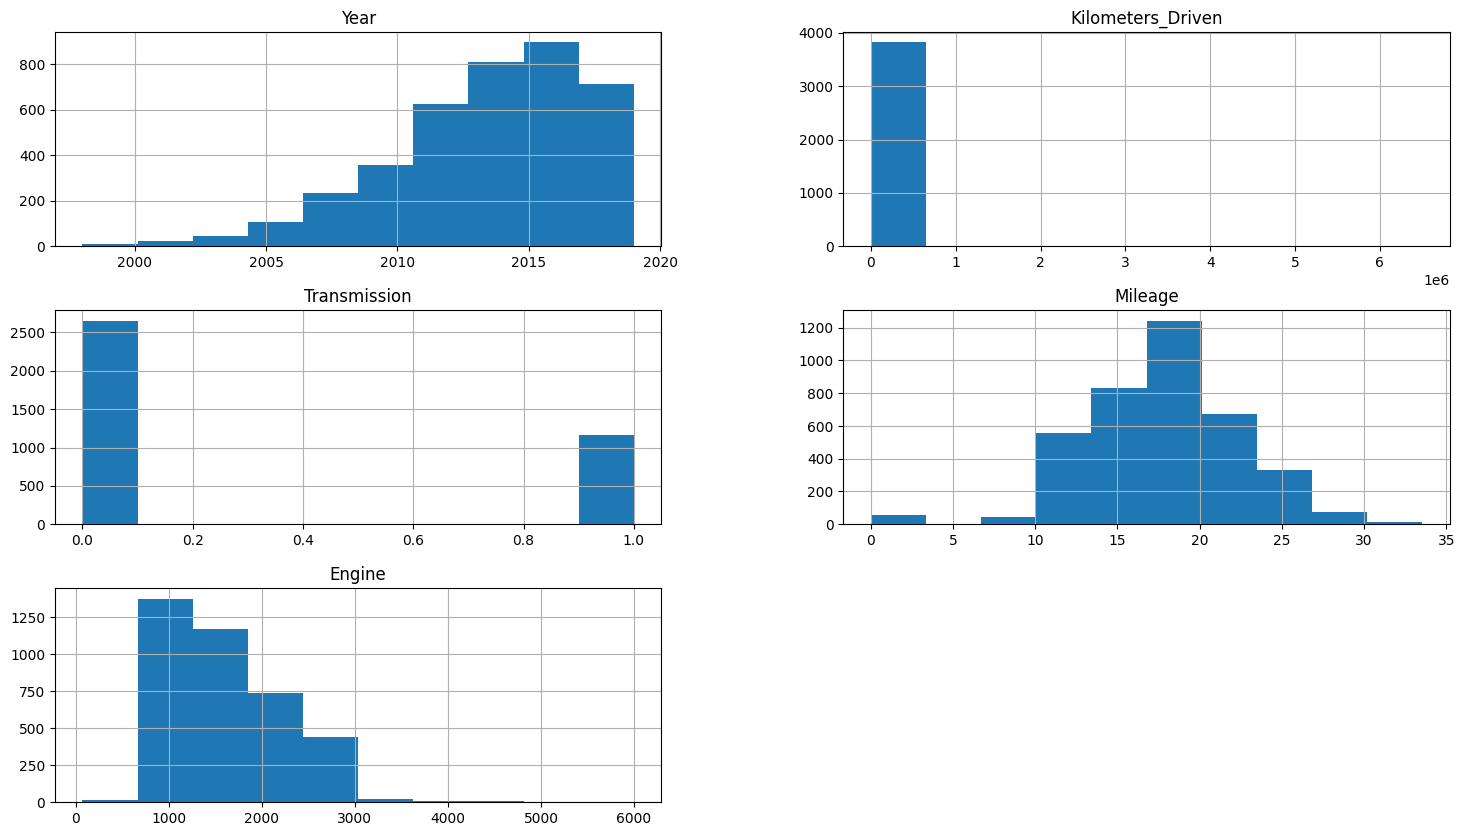

In [536]:
UsedCars.hist(['Year', 'Kilometers_Driven', 'Transmission', 'Mileage', 'Engine'], figsize=(18,10))

In [537]:
UsedCars['Kilometers_Driven'][UsedCars['Kilometers_Driven']<175000].sort_values(ascending=False)

,Kilometers_Driven
1176,172050
2465,171000
2126,170428
5404,170000
1232,170000
...,...
1598,1000
2646,1000
1161,1000
5606,600


In [538]:
UsedCars['Kilometers_Driven'][UsedCars['Kilometers_Driven']>175000] =172050

array([[<Axes: title={'center': 'Kilometers_Driven'}>]], dtype=object)

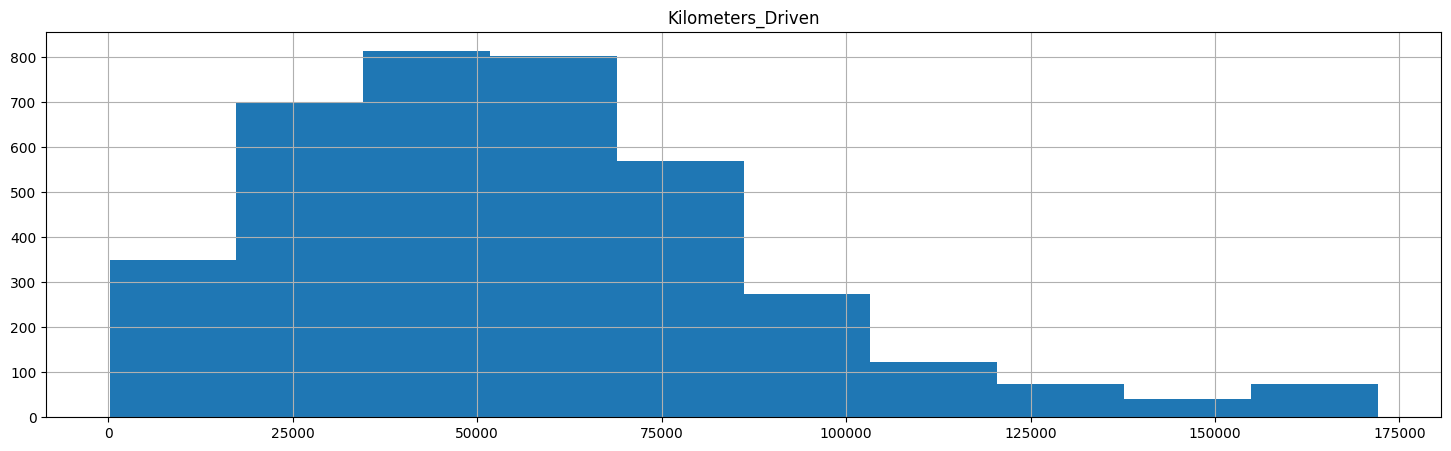

In [539]:
UsedCars.hist(['Kilometers_Driven'], figsize=(18,5))

In [540]:
UsedCars['Mileage'][UsedCars['Mileage']<35].sort_values(ascending=False)

,Mileage
2371,33.54
1332,33.54
3869,33.44
3553,33.44
4769,33.44
...,...
3033,0.00
79,0.00
2842,0.00
2780,0.00


In [541]:
UsedCars['Mileage'][UsedCars['Mileage']>35] =33.54

array([[<Axes: title={'center': 'Mileage'}>]], dtype=object)

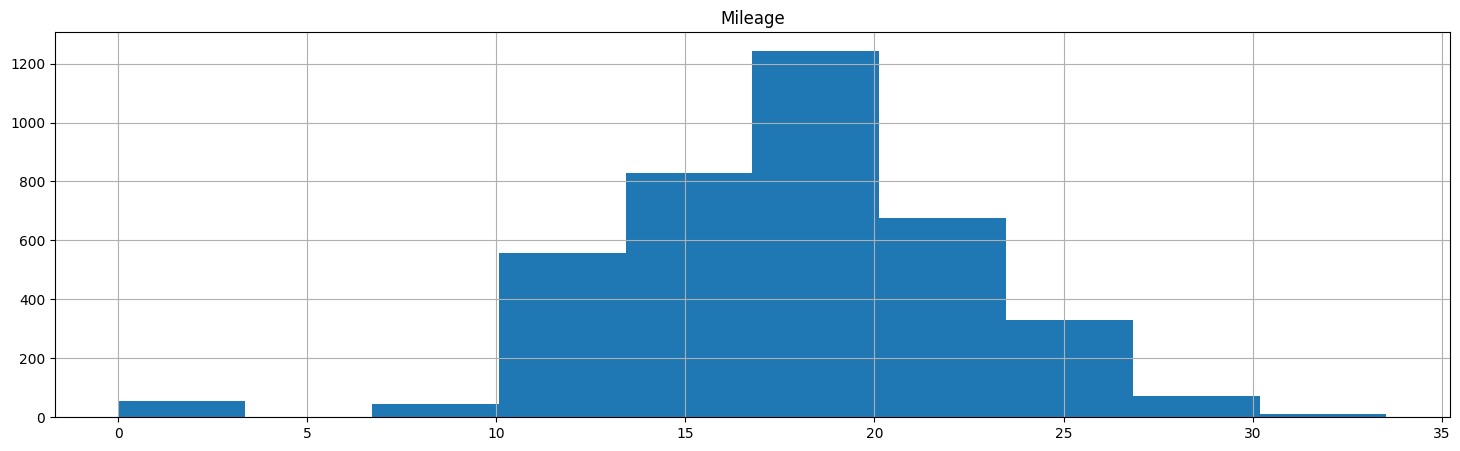

In [542]:
UsedCars.hist(['Mileage'], figsize=(18,5))

In [543]:
UsedCars['Engine'][UsedCars['Engine']<4900].sort_values(ascending=False)

,Engine
70,4806.0
2100,4806.0
5603,4806.0
2978,4806.0
3341,4395.0
...,...
4561,624.0
2645,624.0
761,624.0
5468,624.0


In [544]:
UsedCars['Engine'][UsedCars['Engine']>4900] =48.06

array([[<Axes: title={'center': 'Engine'}>]], dtype=object)

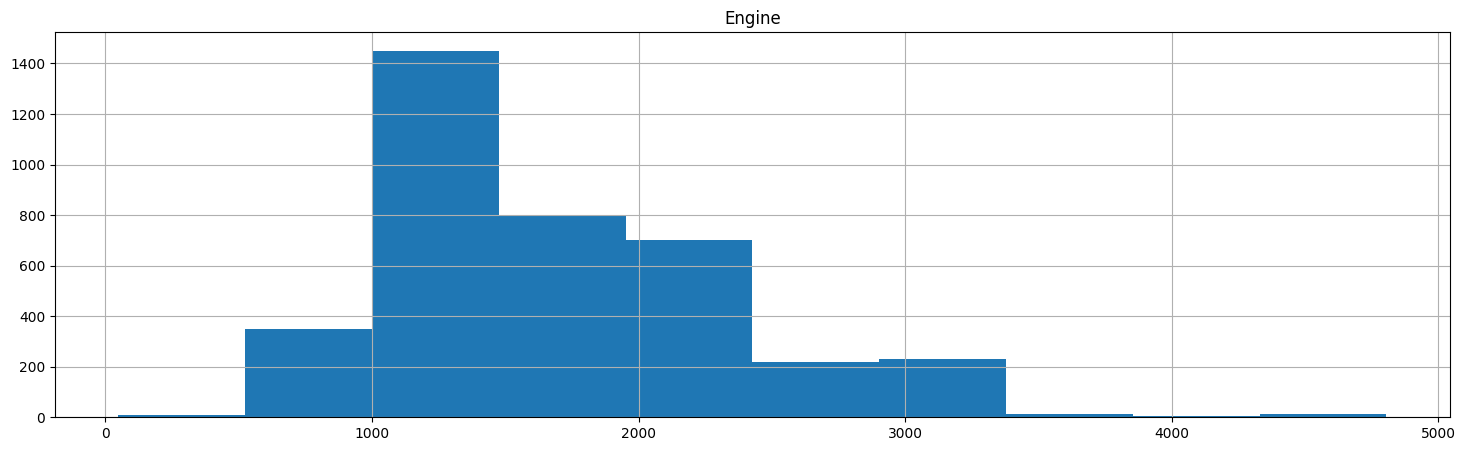

In [545]:
UsedCars.hist(['Engine'], figsize=(18,5))

In [546]:
UsedCars.isnull().sum()

,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,31
Seats,35
Price,0


In [547]:
UsedCars['Mileage'].fillna(UsedCars['Mileage'].median(), inplace=True)

In [548]:
UsedCars['Engine'].fillna(UsedCars['Engine'].median(), inplace=True)

In [504]:
UsedCars.mode()['Seats']

,Seats
0,5.0


In [549]:
UsedCars['Seats'].fillna(UsedCars['Seats'].median(), inplace=True)

In [550]:
UsedCars.isnull().sum()

,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Seats,0
Price,0


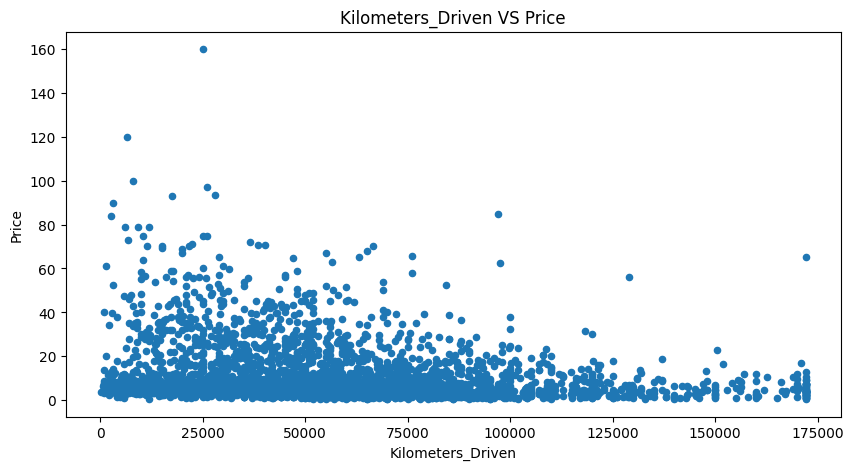

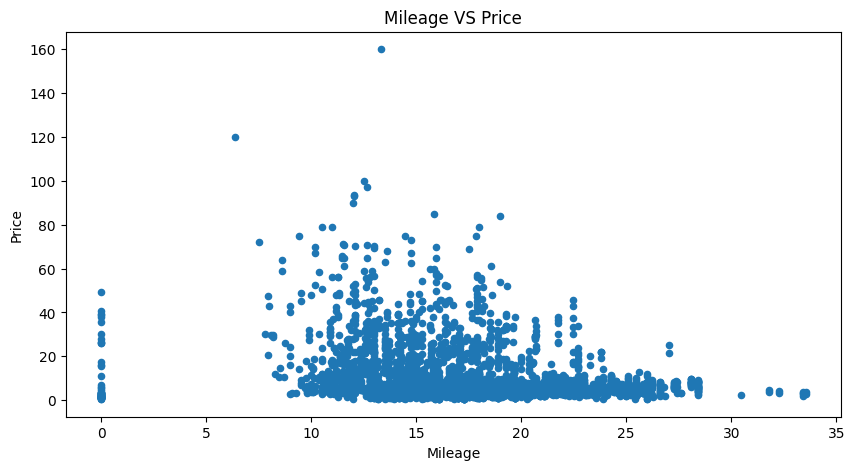

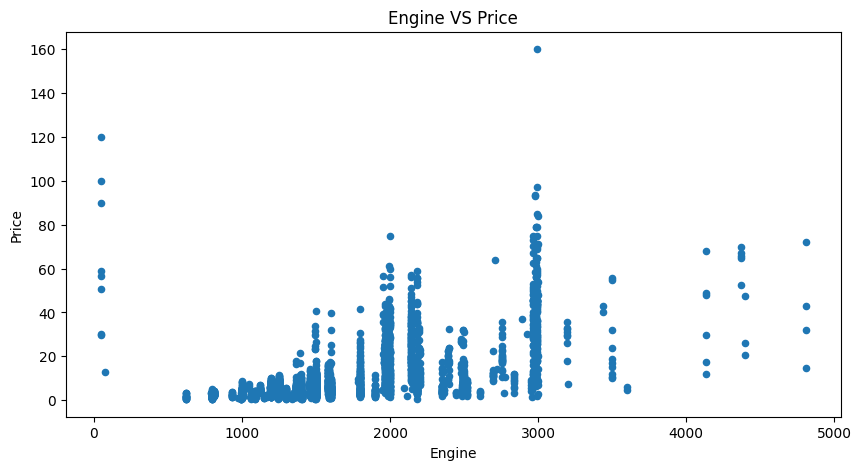

In [551]:
ContinuousCols=['Kilometers_Driven', 'Mileage', 'Engine']

for predictor in ContinuousCols:
    UsedCars.plot.scatter(x=predictor, y='Price', figsize=(10,5), title=predictor+" VS "+ 'Price')

In [552]:
ContinuousCols=['Price', 'Kilometers_Driven', 'Mileage', 'Engine']

CorrelationData=UsedCars[ContinuousCols].corr()
CorrelationData

,Price,Kilometers_Driven,Mileage,Engine
Price,1.000000,-0.212114,-0.270254,0.583711
Kilometers_Driven,-0.212114,1.000000,-0.181312,0.174101
Mileage,-0.270254,-0.181312,1.000000,-0.544443
Engine,0.583711,0.174101,-0.544443,1.000000


In [553]:
CorrelationData['Price'][abs(CorrelationData['Price']) > 0.5 ]

,Price
Price,1.000000
Engine,0.583711


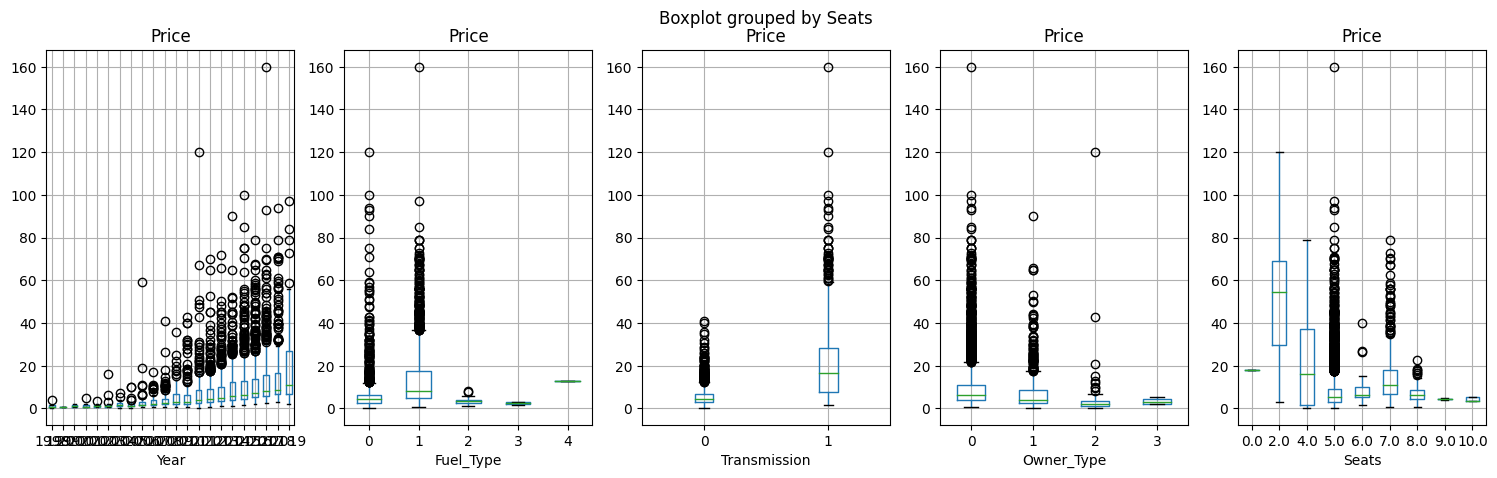

In [554]:
CategoricalColsList=['Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    UsedCars.boxplot(column='Price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [555]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')

    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

CategoricalColsList=['Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']
FunctionAnova(inpData=UsedCars, TargetVariable='Price', CategoricalPredictorList=CategoricalColsList)

##### ANOVA Results ##### 

Year is correlated with Price | P-Value: 1.1000601418960982e-72
Fuel_Type is correlated with Price | P-Value: 1.0935280494293274e-78
Transmission is correlated with Price | P-Value: 0.0
Owner_Type is correlated with Price | P-Value: 2.621828400991753e-10
Seats is correlated with Price | P-Value: 2.213699869173615e-84


['Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']

In [556]:
SelectedColumns=['Engine', 'Year','Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']
DataForML=UsedCars[SelectedColumns]

In [557]:
DataForML.to_pickle('DataForML.pkl')

In [558]:
DataForML_Numeric=pd.get_dummies(DataForML)
DataForML_Numeric['Price']=UsedCars['Price']

In [559]:
DataForML_Numeric.columns

Index(['Engine', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats',
       'Price'],
      dtype='object')

In [560]:
TargetVariable='Price'
Predictors=['Engine', 'Year','Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [561]:
from sklearn.preprocessing import MinMaxScaler

PredictorScaler=MinMaxScaler()

PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [562]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2675, 6)
(2675,)
(1147, 6)
(1147,)


In [563]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

print(RegModel)

LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

print('\n##### Model Validation and Accuracy Calculations ##########')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestingDataResults.head())

TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.5848323115100615

##### Model Validation and Accuracy Calculations ##########
     Engine      Year  Fuel_Type  Transmission  Owner_Type  Seats  Price  \
0  0.618953  0.857143       0.25           1.0    0.000000    0.5  45.00   
1  0.199654  0.666667       0.00           1.0    0.000000    0.5   2.50   
2  0.241478  0.571429       0.00           0.0    0.333333    0.5   2.75   
3  0.304741  0.714286       0.25           0.0    0.333333    0.5   3.50   
4  0.199864  0.904762       0.00           0.0    0.000000    0.5   4.25   

   PredictedPrice  
0            34.0  
1             7.0  
2            -0.0  
3             8.0  
4             5.0  
Mean Accuracy on test data: 4.470972871659811
Median Accuracy on test data: 56.81818181818182

Accuracy values for 10-fold Cross Validation:
 [ 10.35173357  21.14464981  21.30054939  11.20919936  25.04063402
  13.90122958  -4.89600225   8.16630482  -3.74901731 -10.40487922]

Final Average Accuracy of the model: 9

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.8178638382078035

##### Model Validation and Accuracy Calculations ##########
     Engine      Year  Fuel_Type  Transmission  Owner_Type  Seats  Price  \
0  0.618953  0.857143       0.25           1.0    0.000000    0.5  45.00   
1  0.199654  0.666667       0.00           1.0    0.000000    0.5   2.50   
2  0.241478  0.571429       0.00           0.0    0.333333    0.5   2.75   
3  0.304741  0.714286       0.25           0.0    0.333333    0.5   3.50   
4  0.199864  0.904762       0.00           0.0    0.000000    0.5   4.25   

   PredictedPrice  
0            58.0  
1             6.0  
2             3.0  
3             5.0  
4             5.0  
Mean Accuracy on test data: 59.48864311745413
Median Accuracy on test data: 76.80491551459293

Accuracy values for 10-fold Cross Validation:
 [59.88857128 63.88982089 68.77027091 61.16053492 65.19081921 65.71962948
 52.94432815 61.0685742  58.61202489 55.19433037]

Final 

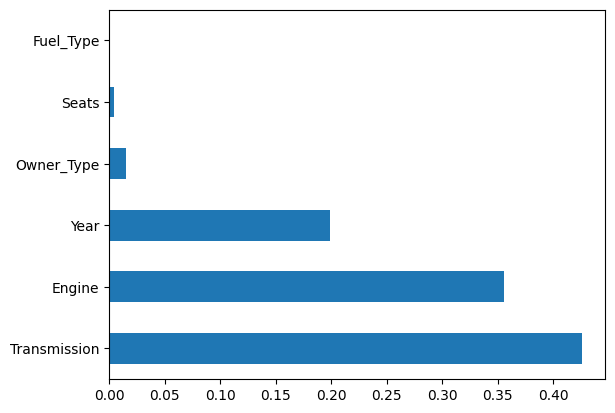

In [564]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')

print(RegModel)

DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

print('\n##### Model Validation and Accuracy Calculations ##########')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestingDataResults.head())

TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.8929114112356753

##### Model Validation and Accuracy Calculations ##########
     Engine      Year  Fuel_Type  Transmission  Owner_Type  Seats  Price  \
0  0.618953  0.857143       0.25           1.0    0.000000    0.5  45.00   
1  0.1

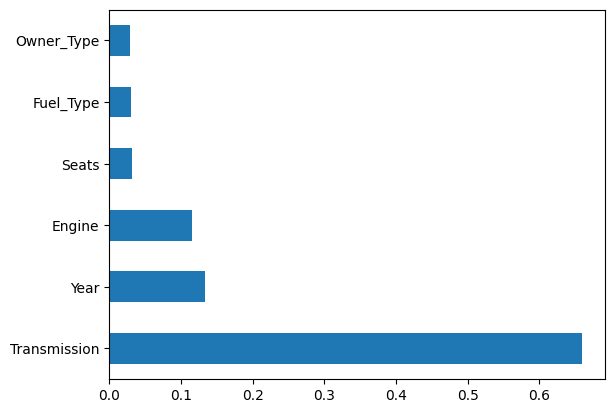

In [565]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')
print(RegModel)

XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
print('\n##### Model Validation and Accuracy Calculations ##########')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestingDataResults.head())

TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [566]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

print(RegModel)

KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

print('\n##### Model Validation and Accuracy Calculations ##########')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestingDataResults.head())

TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.8698332363491896

##### Model Validation and Accuracy Calculations ##########
     Engine      Year  Fuel_Type  Transmission  Owner_Type  Seats  Price  \
0  0.618953  0.857143       0.25           1.0    0.000000    0.5  45.00   
1  0.199654  0.666667       0.00           1.0    0.000000    0.5   2.50   
2  0.241478  0.571429       0.00           0.0    0.333333    0.5   2.75   
3  0.304741  0.714286       0.25           0.0    0.333333    0.5   3.50   
4  0.199864  0.904762       0.00           0.0    0.000000    0.5   4.25   

   PredictedPrice  
0            53.0  
1             4.0  
2             3.0  
3             5.0  
4             6.0  
Mean Accuracy on test data: 66.05292830715771
Median Accuracy on test data: 79.39698492462311

Accuracy values for 10-fold Cross Validation:
 [68.70140961 70.76988832 73.27722918 65.20521557 69.62208921 71.29660331
 58.25968052 67.53198467 70.44997273 67.02776517]

Final Average Accuracy of the mo

In [567]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

print(RegModel)

SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

%matplotlib inline
print('\n##### Model Validation and Accuracy Calculations ##########')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestingDataResults.head())

TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.49131767719012753

##### Model Validation and Accuracy Calculations ##########
     Engine      Year  Fuel_Type  Transmission  Owner_Type  Seats  Price  \
0  0.618953  0.857143       0.25           1.0    0.000000    0.5  45.00   
1  0.199654  0.666667       0.00           1.0    0.000000    0.5   2.50   
2  0.241478  0.571429       0.00           0.0    0.333333    0.5   2.75   
3  0.304741  0.714286       0.25           0.0    0.333333    0.5   3.50   
4  0.199864  0.904762       0.00           0.0    0.000000    0.5   4.25   

   PredictedPrice  
0            23.0  
1             9.0  
2             2.0  
3             6.0  
4             5.0  
Mean Accuracy on test data: 46.98247753307814
Median Accuracy on test data: 71.7948717948718

Accuracy values for 10-fold Cross Validation:
 [48.65440451 55.93936056 57.74168694 48.73359998 56.66943112 53.52189996
 43.72602964 46.90399883 43.98170082 41.71421013]

Final Average Accuracy of the model: 49.76


In [568]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['Engine', 'Year', 'Transmission']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

from sklearn.preprocessing import StandardScaler, MinMaxScaler
PredictorScaler=MinMaxScaler()
PredictorScalerFit=PredictorScaler.fit(X)
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(3822, 3)
(3822,)


In [569]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [69.0713471  72.29223502 74.23696319 69.95061211 71.72784394 69.97256833
 59.53191684 68.07074271 66.66252181 68.7523219 ]

Final Average Accuracy of the model: 69.03


In [570]:
Final_XGB_Model=RegModel.fit(X,y)

In [571]:
import pickle
import os

with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content/drive/MyDrive/ST_Assessment_3
